In [129]:
# Import the necessary packages

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold,StratifiedKFold
import warnings
import gc
import time
import sys
import datetime
from sklearn.metrics import mean_squared_error

In [131]:
from sklearn import metrics
plt.style.use('fivethirtyeight')
sns.set(font_scale=1)
pd.set_option('display.max_columns',500)

In [132]:
santander_train = pd.read_csv('/Users/abhayranjan/kaggle/santander/train.csv')
santander_train.head(n=5)                            

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [133]:
# Explore Train Data

In [134]:
print("Number of Rows in the train is:",santander_train.shape[0])
print("number of columns in train dataset is:",santander_train.shape[1])
print(santander_train.dtypes)
print(santander_train.any(axis=None))
print("**************************")
print(santander_train.isnull().values.any())

Number of Rows in the train is: 200000
number of columns in train dataset is: 202
ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_18

In [135]:
print(santander_train.describe(include='all'))

            ID_code         target          var_0          var_1  \
count        200000  200000.000000  200000.000000  200000.000000   
unique       200000            NaN            NaN            NaN   
top     train_80889            NaN            NaN            NaN   
freq              1            NaN            NaN            NaN   
mean            NaN       0.100490      10.679914      -1.627622   
std             NaN       0.300653       3.040051       4.050044   
min             NaN       0.000000       0.408400     -15.043400   
25%             NaN       0.000000       8.453850      -4.740025   
50%             NaN       0.000000      10.524750      -1.608050   
75%             NaN       0.000000      12.758200       1.358625   
max             NaN       1.000000      20.315000      10.376800   

                var_2          var_3          var_4          var_5  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN       

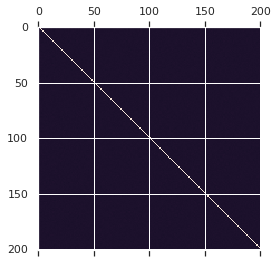

In [136]:
plt.matshow(santander_train.corr())

/Users/abhayranjan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning:

matplotlib.pyplot as already been imported, this call will have no effect.



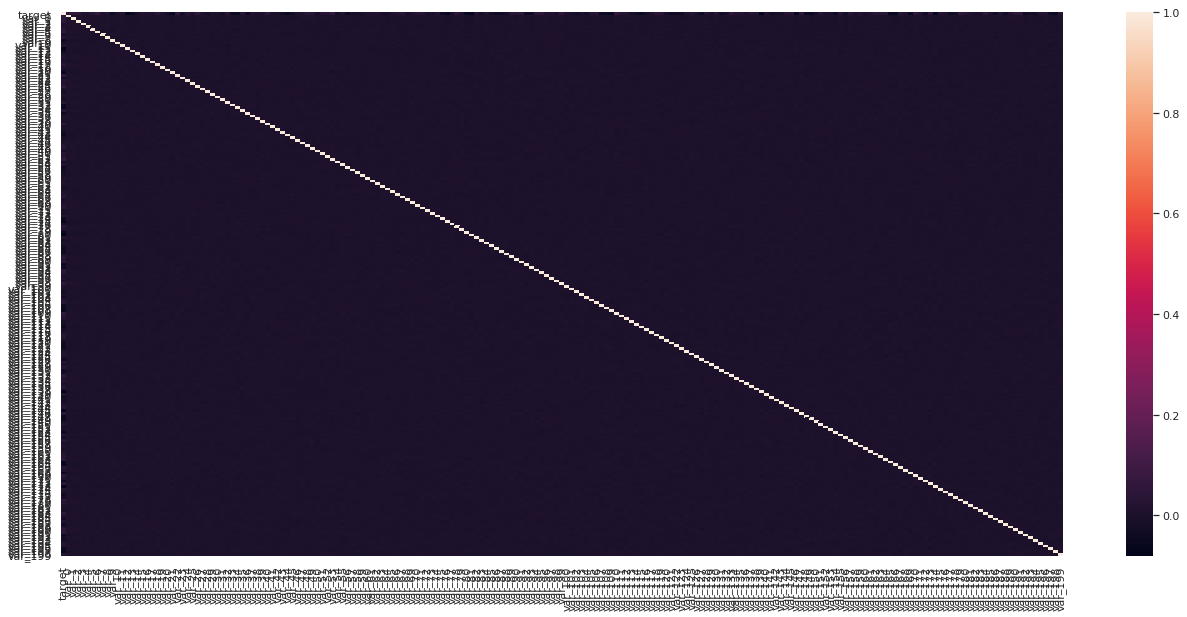

In [137]:
import matplotlib
%matplotlib inline
matplotlib.use('MacOSX')
plt.figure(figsize=(20,10))
corr = santander_train.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

[179902  20098]
Int64Index([0, 1], dtype='int64')


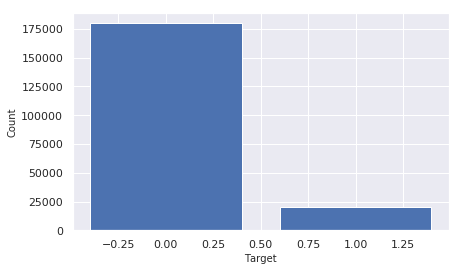

In [138]:
print(santander_train.target.value_counts().values)
print(santander_train.target.value_counts().index)
plt.bar(santander_train.target.value_counts().index.values,santander_train.target.value_counts().values)
plt.xlabel('Target',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.show()

In [139]:
import plotly
#import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
data = [go.Bar(x=santander_train.target.value_counts().index.values,y=santander_train.target.value_counts().values,text='Distribution Of Target Variable')]
layout=go.Layout(title='Target Variable Distribution')
fig = go.Figure(data=data,layout=layout)
plotly.offline.iplot(fig,filename='basic-bar')

In [140]:
# Explore Test Dataset

In [141]:
santander_test = pd.read_csv('/Users/abhayranjan/kaggle/santander/test.csv')
santander_test.head(n=5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-

In [142]:
# Check for difference in columns between training and test dataset
print(set(santander_train.columns) - set(santander_test.columns))

{'target'}


In [143]:
santander_test.describe(include='all')

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0000

In [144]:
features = [c for c in santander_train.columns if c not in ('ID_code','target')]
#target= santander_train['target']

In [145]:
param = {
    'num_leaves':10,
    'max_bin':119,
    'min_data_in_leaf':11,
    'learning_rate':0.02,
    'bagging_fraction':1.0,
    'bagging_freq':5,
    'feature_fraction':0.05,
    'min_gain_to_split':0.65,
    'max_depth':32,
    'save_binary':True,
    'objective':'binary',
    'boosting_type':'gbdt',
    'metric':'auc',
    'is_unbalanced':True,    
}

In [146]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif_(santander_train,thresh=5.0):
    variables = list(range(santander_train.shape[1]))
    print(variables)
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(santander_train.iloc[:,variables].values,ix)
              for ix in range(santander_train.iloc[:,variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif)> thresh:
            print('dropping\'' + santander_train.iloc[:,variables].columns[maxloc] + ": "+ str(maxloc))
            del variables[maxloc]
            dropped = True
    print('Remaining Variables:')
    print(santander_train.columns[variables])
    #return santander_train.iloc[variables]
    return santander_train.columns[variables]

In [147]:
print('before calling the Function')
santander_train_clean = santander_train.drop(['ID_code','target'],axis=1)
santander_train_new = santander_train_clean.iloc[0:10000,]
var = calculate_vif_(santander_train_new,thresh=5.0)
print(var)

before calling the Function
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
dropping'var_68: 68
dropping'var_108: 107
dropping'var_12: 12
dropping'var_25: 24

In [148]:
new_var = santander_train_clean.columns
non_correlated_var = list(set(new_var) - set(var))
print(non_correlated_var)
print(type(non_correlated_var))

['var_85', 'var_169', 'var_148', 'var_136', 'var_59', 'var_133', 'var_49', 'var_42', 'var_66', 'var_166', 'var_60', 'var_25', 'var_24', 'var_93', 'var_98', 'var_94', 'var_20', 'var_77', 'var_16', 'var_105', 'var_151', 'var_129', 'var_23', 'var_125', 'var_194', 'var_46', 'var_68', 'var_106', 'var_2', 'var_81', 'var_38', 'var_174', 'var_111', 'var_50', 'var_132', 'var_108', 'var_12', 'var_186', 'var_191', 'var_197', 'var_55', 'var_43', 'var_71', 'var_92', 'var_101', 'var_31', 'var_78', 'var_175', 'var_103', 'var_107', 'var_158', 'var_6', 'var_121', 'var_3', 'var_161', 'var_156', 'var_165', 'var_114', 'var_172', 'var_0', 'var_7', 'var_14', 'var_28', 'var_64', 'var_163', 'var_152', 'var_15', 'var_4', 'var_142', 'var_21', 'var_143', 'var_126', 'var_102', 'var_160', 'var_91', 'var_162', 'var_109', 'var_53', 'var_112', 'var_198', 'var_159', 'var_34', 'var_57', 'var_150', 'var_146', 'var_73', 'var_104', 'var_9', 'var_33', 'var_37', 'var_79', 'var_130', 'var_56', 'var_88', 'var_177', 'var_181',

In [149]:
features_up = list(non_correlated_var)
#target= santander_train['target']
#santander_train_up = santander_train[list(non_correlated_var)]

In [150]:
# Check for Imbalance of Classes

In [151]:
santander_train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [152]:
#Balance the classes

In [153]:
from sklearn.utils import resample
santander_majority = santander_train[santander_train.target==0]
santander_minority = santander_train[santander_train.target==1]
print(santander_majority.shape[0])
print(santander_minority.shape[1])
santander_minority_upsampled = resample(santander_minority,replace=True,n_samples=179902,random_state=123)
# Combine majority class with minority upsampled class
santander_upsampled = pd.concat([santander_majority,santander_minority_upsampled])
print(santander_upsampled.target.value_counts())
target = santander_upsampled["target"]

179902
202
1    179902
0    179902
Name: target, dtype: int64


In [154]:
santander_train_up = santander_upsampled[list(non_correlated_var)]

In [155]:
from sklearn.metrics import roc_auc_score,roc_curve
skf_up = StratifiedKFold(n_splits=5,shuffle=True,random_state=2000)
oof_up= np.zeros(len(santander_train_up))
predictions_up = np.zeros(len(santander_test))
feature_importance_df_up = pd.DataFrame()
print("test")

test


In [156]:
for fold_,(trn_idx,val_idx) in enumerate(skf_up.split(santander_train_up.values,target.values)):
    print("fold n{}".format(fold_))
    train_data = lgb.Dataset(santander_train_up.iloc[trn_idx][list(features_up)],label=target.iloc[trn_idx])
    val_data = lgb.Dataset(santander_train_up.iloc[val_idx][list(features_up)],label=target.iloc[val_idx])
    num_round=10000
    params = {}
    clf_up = lgb.train(param,train_data,num_round,valid_sets=[train_data,val_data],verbose_eval=1000,early_stopping_rounds=500)
    oof_up[val_idx] = clf.predict(santander_train_up.iloc[val_idx][features_up],num_iteration = clf.best_iteration)
    fold_importance_df_up = pd.DataFrame()
    fold_importance_df_up["feature"] = list(features_up)
    fold_importance_df_up["importance"] = clf_up.feature_importance()
    fold_importance_df_up["fold"] = fold_+1
    feature_importance_df_up = pd.concat([feature_importance_df,fold_importance_df],axis=0)
    predictions_up += clf_up.predict(santander_test[list(features_up)],num_iteration=clf.best_iteration)/5
    
print("CV Score: {:<8.5f}".format(roc_auc_score(target,oof_up)))

fold n0
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.838501	valid_1's auc: 0.833969
[2000]	training's auc: 0.85053	valid_1's auc: 0.844483
[3000]	training's auc: 0.861207	valid_1's auc: 0.853108
[4000]	training's auc: 0.871736	valid_1's auc: 0.861503
[5000]	training's auc: 0.881856	valid_1's auc: 0.86955
[6000]	training's auc: 0.891375	valid_1's auc: 0.877247
[7000]	training's auc: 0.900249	valid_1's auc: 0.884532
[8000]	training's auc: 0.908473	valid_1's auc: 0.891267
[9000]	training's auc: 0.916077	valid_1's auc: 0.897597
[10000]	training's auc: 0.923143	valid_1's auc: 0.903605
Did not meet early stopping. Best iteration is:
[10000]	training's auc: 0.923143	valid_1's auc: 0.903605
fold n1
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.838694	valid_1's auc: 0.832763
[2000]	training's auc: 0.850695	valid_1's auc: 0.842695
[3000]	training's auc: 0.861442	valid_1's auc: 0.851393
[4000]	training's auc: 0.8

In [157]:
submission_df_up = pd.DataFrame({"ID_Code":santander_test.ID_code.values})
submission_df_up['target'] = predictions_up
print(submission_df_up.head(n=10))
submission_df.to_csv("Customer-Prediction_up.csv",index=False)

  ID_Code    target
0  test_0  0.230132
1  test_1  0.385553
2  test_2  0.303800
3  test_3  0.436021
4  test_4  0.302406
5  test_5  0.038827
6  test_6  0.229299
7  test_7  0.663502
8  test_8  0.100679
9  test_9  0.161218
